#Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Important to run this beforehand

In [ ]:
pip install scikeras

##Importing the Data

In [ ]:
file = "/content/drive/MyDrive/Colab Notebooks/data/PhiUSIIL_Phishing_URL_Dataset.csv"

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None) #I want to see all of the columns in the df

In [ ]:
url_df = pd.read_csv(file, sep=",")
url_df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,voice fm southampton,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,home page: seminars in fetal and neonatal medi...,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,0.0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,skincareliving,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,0.0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,winchestergov,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,0.0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,nononsensedesign,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,2,0,0,0.0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,patient-cell-40f5updatedlogmyloginworkers,0.000000,0.000000,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0,0


important to note (from website): "Label 0 corresponds to a legitimate URL, label 1 to a phishing URL"

In [ ]:
url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

##Boxplot of URL Lengths

In [ ]:
import matplotlib.pyplot as plt

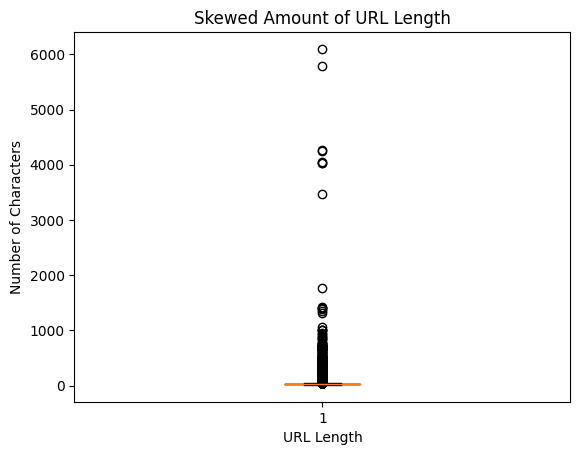

In [ ]:
plt.boxplot(url_df["URLLength"]) #data is HEAVILY skewed
plt.xlabel('URL Length')
plt.ylabel('Number of Characters')
plt.title('Skewed Amount of URL Length')

# Display the plot
plt.show()

In [ ]:
print(f'Median: {np.median(url_df["URLLength"])}')
print(f'Average: {url_df["URLLength"].mean()}')

Median: 27.0
Average: 34.57309527343667


##Boxplot for Lines of Code

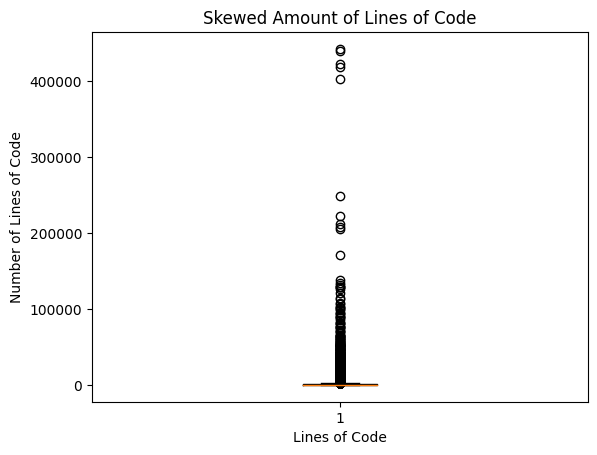

In [ ]:
plt.boxplot(url_df["LineOfCode"]) #data is HEAVILY skewed
plt.xlabel('Lines of Code')
plt.ylabel('Number of Lines of Code')
plt.title('Skewed Amount of Lines of Code')

# Display the plot
plt.show()

In [ ]:
print(f'Median: {np.median(url_df["LineOfCode"])}')
print(f'Average: {url_df["LineOfCode"].mean()}')
print(f'Maximum: {url_df["LineOfCode"].max()}')

Median: 429.0
Average: 1141.9004431815772
Maximum: 442666


##Dropping Columns

In [ ]:
url_df.isna().sum().sum() #no NA values in this dataframe

0

In [ ]:
url_df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [ ]:
#I don't think we'll be needing "FILENAME" for any of our analysis because it's too unique
del url_df["FILENAME"]
url_df

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,voice fm southampton,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,home page: seminars in fetal and neonatal medi...,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,0.0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,skincareliving,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191,1
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,0.0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,winchestergov,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31,1
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,0.0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,nononsensedesign,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,2,0,0,0.0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,patient-cell-40f5updatedlogmyloginworkers,0.000000,0.000000,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0,0


In [ ]:
del url_df["Title"]
url_df

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,0.0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191,1
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,0.0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31,1
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,0.0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,2,0,0,0.0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,0.000000,0.000000,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0,0


##Separating the "label" Column as it has the answers to each row

In [ ]:
label = url_df["label"]
label

0         1
1         1
2         1
3         1
4         1
         ..
235790    1
235791    1
235792    1
235793    0
235794    1
Name: label, Length: 235795, dtype: int64

In [ ]:
url_df.drop(columns="label", inplace=True)
url_df

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,0.0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,0.0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,0.0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,2,0,0,0.0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,0.000000,0.000000,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0


In [ ]:
del url_df["ObfuscationRatio"]
url_df

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,3,1,0,0,18,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,2,1,0,0,9,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,2,2,0,0,15,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,3,1,0,0,13,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,3,1,0,0,20,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,2,0,0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,0.000000,0.000000,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0


In [ ]:
del url_df["URL"]
url_df

,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,3,1,0,0,18,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124
1,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,2,1,0,0,9,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217
2,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,2,2,0,0,15,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5
3,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,3,1,0,0,13,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31
4,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,3,1,0,0,20,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191
235791,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31
235792,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67
235793,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,2,0,0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,0.000000,0.000000,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0


In [ ]:
del url_df["Domain"]
url_df

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,0,com,100.000000,1.000000,0.522907,0.061933,3,1,0,0,18,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124
1,23,16,0,de,100.000000,0.666667,0.032650,0.050207,2,1,0,0,9,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217
2,29,22,0,uk,100.000000,0.866667,0.028555,0.064129,2,2,0,0,15,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5
3,26,19,0,com,100.000000,1.000000,0.522907,0.057606,3,1,0,0,13,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31
4,33,26,0,org,100.000000,1.000000,0.079963,0.059441,3,1,0,0,20,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191
235791,28,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31
235792,30,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67
235793,55,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,2,0,0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,0.000000,0.000000,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0


In [ ]:
del url_df["TLD"]
url_df

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,0,18,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,0,9,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,0,15,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,0,13,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,0,20,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,0.000000,0.000000,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0


##Normalizing the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
columns = url_df[["URLLength", "DomainLength", "URLSimilarityIndex", "TLDLength", "NoOfSubDomain", "NoOfObfuscatedChar", "NoOfLettersInURL", "NoOfDegitsInURL", "NoOfEqualsInURL", "NoOfQMarkInURL", "NoOfAmpersandInURL", "NoOfOtherSpecialCharsInURL", "LineOfCode", "LargestLineLength", "DomainTitleMatchScore", "URLTitleMatchScore", "NoOfPopup", "NoOfiFrame", "NoOfImage", "NoOfCSS", "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef", "NoOfExternalRef"]]
columns

,URLLength,DomainLength,URLSimilarityIndex,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfLettersInURL,NoOfDegitsInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,LineOfCode,LargestLineLength,DomainTitleMatchScore,URLTitleMatchScore,NoOfPopup,NoOfiFrame,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,100.000000,3,1,0,18,0,0,0,0,1,558,9381,0.000000,0.000000,0,1,34,20,28,119,0,124
1,23,16,100.000000,2,1,0,9,0,0,0,0,2,618,9381,55.555556,55.555556,0,0,50,9,8,39,0,217
2,29,22,100.000000,2,2,0,15,0,0,0,0,2,467,682,46.666667,46.666667,0,0,10,2,7,42,2,5
3,26,19,100.000000,3,1,0,13,0,0,0,0,1,6356,26824,0.000000,0.000000,1,12,3,27,15,22,1,31
4,33,26,100.000000,3,1,0,20,0,0,0,0,1,6089,28404,100.000000,100.000000,0,2,244,15,34,72,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,100.000000,3,1,0,16,0,0,0,0,1,2007,9381,100.000000,100.000000,0,0,51,7,21,187,2,191
235791,28,21,100.000000,2,2,0,14,0,0,0,0,2,1081,348,0.000000,0.000000,0,0,50,1,7,88,0,31
235792,30,23,100.000000,2,1,0,17,0,0,0,0,1,709,13277,100.000000,100.000000,0,0,27,10,30,58,2,67
235793,55,47,28.157537,3,2,0,39,3,0,0,0,5,125,1807,0.000000,0.000000,0,2,0,0,3,0,0,0


In [ ]:
url_df_normal = pd.DataFrame(scaler.fit_transform(columns), columns=columns.columns)

In [ ]:
url_df_normal

,URLLength,DomainLength,URLSimilarityIndex,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfLettersInURL,NoOfDegitsInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,LineOfCode,LargestLineLength,DomainTitleMatchScore,URLTitleMatchScore,NoOfPopup,NoOfiFrame,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,0.002959,0.188679,1.000000,0.090909,0.1,0.0,0.003468,0.000000,0.0,0.0,0.0,0.002004,0.001256,0.000670,0.000000,0.000000,0.000000,0.000624,0.003796,0.000558,0.004025,0.004344,0.000000,0.004506
1,0.001644,0.113208,1.000000,0.000000,0.1,0.0,0.001734,0.000000,0.0,0.0,0.0,0.004008,0.001392,0.000670,0.555556,0.555556,0.000000,0.000000,0.005583,0.000251,0.001150,0.001424,0.000000,0.007886
2,0.002630,0.169811,1.000000,0.000000,0.2,0.0,0.002890,0.000000,0.0,0.0,0.0,0.004008,0.001050,0.000047,0.466667,0.466667,0.000000,0.000000,0.001117,0.000056,0.001006,0.001533,0.000409,0.000182
3,0.002137,0.141509,1.000000,0.090909,0.1,0.0,0.002504,0.000000,0.0,0.0,0.0,0.002004,0.014354,0.001918,0.000000,0.000000,0.001661,0.007491,0.000335,0.000754,0.002156,0.000803,0.000205,0.001127
4,0.003287,0.207547,1.000000,0.090909,0.1,0.0,0.003853,0.000000,0.0,0.0,0.0,0.002004,0.013751,0.002031,1.000000,1.000000,0.000000,0.001248,0.027244,0.000419,0.004887,0.002628,0.000205,0.003089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,0.002630,0.169811,1.000000,0.090909,0.1,0.0,0.003082,0.000000,0.0,0.0,0.0,0.002004,0.004529,0.000670,1.000000,1.000000,0.000000,0.000000,0.005695,0.000195,0.003019,0.006826,0.000409,0.006941
235791,0.002465,0.160377,1.000000,0.000000,0.2,0.0,0.002697,0.000000,0.0,0.0,0.0,0.004008,0.002438,0.000023,0.000000,0.000000,0.000000,0.000000,0.005583,0.000028,0.001006,0.003212,0.000000,0.001127
235792,0.002794,0.179245,1.000000,0.000000,0.1,0.0,0.003275,0.000000,0.0,0.0,0.0,0.002004,0.001597,0.000948,1.000000,1.000000,0.000000,0.000000,0.003015,0.000279,0.004312,0.002117,0.000409,0.002435
235793,0.006903,0.405660,0.280456,0.090909,0.2,0.0,0.007513,0.001492,0.0,0.0,0.0,0.010020,0.000278,0.000128,0.000000,0.000000,0.000000,0.001248,0.000000,0.000000,0.000431,0.000000,0.000000,0.000000


In [ ]:
url_df_1 = url_df[["IsDomainIP", "CharContinuationRate", "TLDLegitimateProb", "URLCharProb", "HasObfuscation", "LetterRatioInURL", "DegitRatioInURL", "SpacialCharRatioInURL", "IsHTTPS", "HasTitle", "HasFavicon", "Robots", "IsResponsive", "NoOfURLRedirect", "NoOfSelfRedirect", "HasDescription", "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton", "HasHiddenFields", "HasPasswordField", "Bank", "Pay", "Crypto", "HasCopyrightInfo"]]

##Combining into Final Version

In [ ]:
final_url_df = pd.concat([url_df_1, url_df_normal, label], axis=1) #axis specifies concatenating vertically
final_url_df

,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,HasObfuscation,LetterRatioInURL,DegitRatioInURL,SpacialCharRatioInURL,IsHTTPS,HasTitle,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,URLLength,DomainLength,URLSimilarityIndex,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfLettersInURL,NoOfDegitsInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,LineOfCode,LargestLineLength,DomainTitleMatchScore,URLTitleMatchScore,NoOfPopup,NoOfiFrame,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,0,1.000000,0.522907,0.061933,0,0.581,0.000,0.032,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0.002959,0.188679,1.000000,0.090909,0.1,0.0,0.003468,0.000000,0.0,0.0,0.0,0.002004,0.001256,0.000670,0.000000,0.000000,0.000000,0.000624,0.003796,0.000558,0.004025,0.004344,0.000000,0.004506,1
1,0,0.666667,0.032650,0.050207,0,0.391,0.000,0.087,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0.001644,0.113208,1.000000,0.000000,0.1,0.0,0.001734,0.000000,0.0,0.0,0.0,0.004008,0.001392,0.000670,0.555556,0.555556,0.000000,0.000000,0.005583,0.000251,0.001150,0.001424,0.000000,0.007886,1
2,0,0.866667,0.028555,0.064129,0,0.517,0.000,0.069,1,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0.002630,0.169811,1.000000,0.000000,0.2,0.0,0.002890,0.000000,0.0,0.0,0.0,0.004008,0.001050,0.000047,0.466667,0.466667,0.000000,0.000000,0.001117,0.000056,0.001006,0.001533,0.000409,0.000182,1
3,0,1.000000,0.522907,0.057606,0,0.500,0.000,0.038,1,1,0,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0.002137,0.141509,1.000000,0.090909,0.1,0.0,0.002504,0.000000,0.0,0.0,0.0,0.002004,0.014354,0.001918,0.000000,0.000000,0.001661,0.007491,0.000335,0.000754,0.002156,0.000803,0.000205,0.001127,1
4,0,1.000000,0.079963,0.059441,0,0.606,0.000,0.030,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0.003287,0.207547,1.000000,0.090909,0.1,0.0,0.003853,0.000000,0.0,0.0,0.0,0.002004,0.013751,0.002031,1.000000,1.000000,0.000000,0.001248,0.027244,0.000419,0.004887,0.002628,0.000205,0.003089,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,0,1.000000,0.522907,0.058739,0,0.552,0.000,0.034,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,0,1,0.002630,0.169811,1.000000,0.090909,0.1,0.0,0.003082,0.000000,0.0,0.0,0.0,0.002004,0.004529,0.000670,1.000000,1.000000,0.000000,0.000000,0.005695,0.000195,0.003019,0.006826,0.000409,0.006941,1
235791,0,0.785714,0.028555,0.053834,0,0.500,0.000,0.071,1,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0.002465,0.160377,1.000000,0.000000,0.2,0.0,0.002697,0.000000,0.0,0.0,0.0,0.004008,0.002438,0.000023,0.000000,0.000000,0.000000,0.000000,0.005583,0.000028,0.001006,0.003212,0.000000,0.001127,1
235792,0,1.000000,0.003319,0.063093,0,0.567,0.000,0.033,1,1,1,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0.002794,0.179245,1.000000,0.000000,0.1,0.0,0.003275,0.000000,0.0,0.0,0.0,0.002004,0.001597,0.000948,1.000000,1.000000,0.000000,0.000000,0.003015,0.000279,0.004312,0.002117,0.000409,0.002435,1
235793,0,0.465116,0.000961,0.050211,0,0.709,0.055,0.091,1,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0.006903,0.405660,0.280456,0.090909,0.2,0.0,0.007513,0.001492,0.0,0.0,0.0,0.010020,0.000278,0.000128,0.000000,0.000000,0.000000,0.001248,0.000000,0.000000,0.000431,0.000000,0.000000,0.000000,0


#Naive Bayes - Leslie Treminio

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
X = final_url_df.drop('label', axis=1)
y = final_url_df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize Naive Bayes classifier (GaussianNB for continuous features)
naive_bayes_model = GaussianNB()

In [ ]:
# Train the model
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the testing set
y_pred = naive_bayes_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9995476328475099


##Confusion Matrix

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[30144     7]
 [   25 40563]]


##Classification Report

In [ ]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30151
           1       1.00      1.00      1.00     40588

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



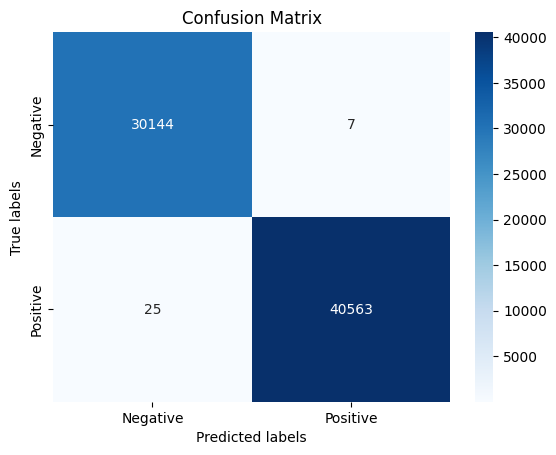

In [ ]:
# Define labels for the confusion matrix (binary classification)
labels = ['Negative', 'Positive']

# Create a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

##Cross Validation

In [ ]:
# Define the cross-validation strategy (e.g., K-Fold with k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate scores
cv_scores = cross_val_score(naive_bayes_model, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.99959711 0.99934265 0.9995547  0.99972434 0.99953349]
Mean Accuracy: 0.9995504569647362


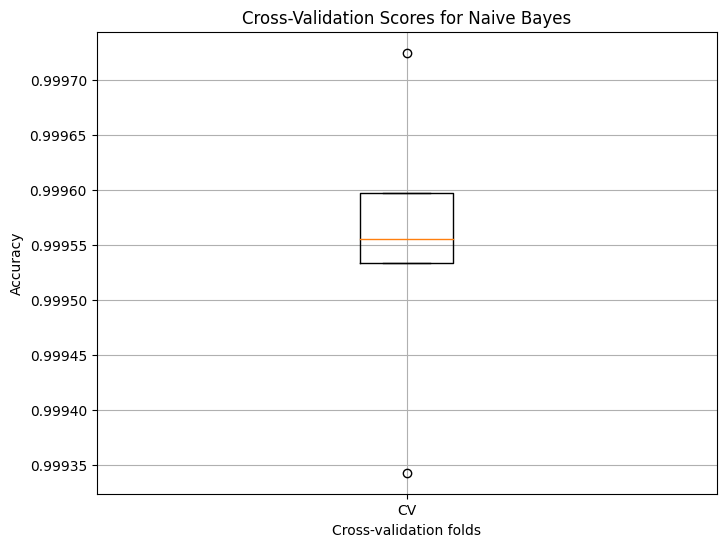

In [ ]:
# Plotting the cross-validation scores as a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.xlabel('Cross-validation folds')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Naive Bayes')
plt.xticks([1], ['CV'])
plt.grid(True)
plt.show()

##Misclassified Rows

In [ ]:
# Add a column of predicted values to the DataFrame
final_url_df['predicted_label'] = naive_bayes_model.predict(X)

# Filter rows where the predicted label differs from the actual label
misclassified_rows = final_url_df[final_url_df['label'] != final_url_df['predicted_label']]

# Output the misclassified rows
print("Misclassified Rows:")
misclassified_rows

Misclassified Rows:


,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,HasObfuscation,LetterRatioInURL,DegitRatioInURL,SpacialCharRatioInURL,IsHTTPS,HasTitle,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,URLLength,DomainLength,URLSimilarityIndex,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,NoOfLettersInURL,NoOfDegitsInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,LineOfCode,LargestLineLength,DomainTitleMatchScore,URLTitleMatchScore,NoOfPopup,NoOfiFrame,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,predicted_label
4549,0,1.000000,0.522907,0.071354,0,0.435,0.000,0.043,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0.001644,0.113208,1.0,0.090909,0.1,0.0,0.001926,0.000000,0.0,0.0,0.0,0.002004,0.001495,0.000040,0.0,0.0,0.000000,0.001248,0.001452,0.000084,0.001006,0.000621,0.000614,0.000763,1,0
6191,0,0.785714,0.000750,0.057969,0,0.500,0.000,0.071,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0.002465,0.160377,1.0,0.000000,0.2,0.0,0.002697,0.000000,0.0,0.0,0.0,0.004008,0.002074,0.000079,0.0,0.0,0.004983,0.000000,0.000112,0.000168,0.003306,0.000000,0.000000,0.000254,1,0
7535,0,1.000000,0.522907,0.068478,0,0.480,0.000,0.040,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.001972,0.132075,1.0,0.090909,0.1,0.0,0.002312,0.000000,0.0,0.0,0.0,0.002004,0.000070,0.000006,1.0,1.0,0.000000,0.000000,0.000000,0.000028,0.000287,0.000037,0.000000,0.000000,0,1
15987,0,1.000000,0.003319,0.036990,0,0.261,0.174,0.043,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.001644,0.113208,1.0,0.000000,0.1,0.0,0.001156,0.001989,0.0,0.0,0.0,0.002004,0.000626,0.000042,1.0,1.0,0.000000,0.000624,0.000893,0.000028,0.000719,0.000256,0.000000,0.000182,1,0
16475,0,1.000000,0.012927,0.013996,0,0.056,0.222,0.056,1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0.000822,0.066038,1.0,0.000000,0.1,0.0,0.000193,0.001989,0.0,0.0,0.0,0.002004,0.001035,0.000031,1.0,1.0,0.000000,0.000000,0.001563,0.000084,0.001006,0.000621,0.000000,0.000145,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229246,0,1.000000,0.002294,0.054347,0,0.594,0.000,0.031,1,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0.003123,0.198113,1.0,0.000000,0.1,0.0,0.003660,0.000000,0.0,0.0,0.0,0.002004,0.001859,0.000624,0.0,0.0,0.000000,0.001248,0.005695,0.000084,0.001006,0.000621,0.000000,0.000763,1,0
229405,0,1.000000,0.522907,0.057857,0,0.519,0.000,0.037,1,0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,0.002301,0.150943,1.0,0.090909,0.1,0.0,0.002697,0.000000,0.0,0.0,0.0,0.002004,0.001130,0.000057,0.0,0.0,0.003322,0.000624,0.000112,0.000028,0.000431,0.000402,0.000000,0.000436,1,0
230746,0,0.818182,0.001354,0.062471,0,0.440,0.000,0.080,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0.001972,0.132075,1.0,0.000000,0.2,0.0,0.002119,0.000000,0.0,0.0,0.0,0.004008,0.000603,0.000049,0.0,0.0,0.000000,0.000000,0.000335,0.000279,0.000575,0.000913,0.001023,0.000036,1,0
233839,0,1.000000,0.079963,0.053871,0,0.552,0.000,0.034,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0.002630,0.169811,1.0,0.090909,0.1,0.0,0.003082,0.000000,0.0,0.0,0.0,0.002004,0.000739,0.000015,0.0,0.0,0.000000,0.000624,0.001563,0.000056,0.001006,0.000146,0.001637,0.000073,1,0


#Neural Network - Alex Baldwin

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_url_df, label, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((188636, 51), (47159, 51), (188636,), (47159,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network structure
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9646 - loss: 0.0711 - val_accuracy: 1.0000 - val_loss: 1.1452e-09
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9998 - loss: 4.3754e-04 - val_accuracy: 1.0000 - val_loss: 7.6256e-12
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9999 - loss: 1.7544e-04 - val_accuracy: 1.0000 - val_loss: 1.0812e-10
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 1.0000 - loss: 3.9562e-05 - val_accuracy: 1.0000 - val_loss: 7.2676e-13
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 1.0000 - loss: 1.4765e-04 - val_accuracy: 1.0000 - val_loss: 1.5742e-12
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 1.0000 - loss: 7.3787e-04 - val_accuracy: 1.0000 - val_loss: 8.8578e-16
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 2.6727e-05 - val_accuracy: 1.0000 - val_loss: 1.1104e-17
Epoch 8/10
2358/2358 ━━━━━━━━━━━

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

Test Loss: 7.242127316744167e-22, Test Accuracy: 1.0


In [ ]:
# Neural network
#model = Sequential([
    #Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    #Dense(32, activation='relu'),
    #Dense(1, activation='sigmoid')
#])
#model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
#history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
#test_loss, test_accuracy = model.evaluate(X_test, y_test)

#print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import numpy as np
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a function to create the model (necessary for using KerasClassifier)
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(model=create_model, epochs=10, batch_size=64, verbose=1)

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2358/2358 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9710 - loss: 0.0618
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 1.0000 - loss: 2.6448e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 2.3810e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 2.7466e-04
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 8.7080e-05
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 1.0000 - loss: 8.5243e-05
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 1.0000 - loss: 1.5299e-05
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 3.4384e-05
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 4.6871e-05
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 5.7017e-05
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2358/2358 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9643 - loss: 0.0670
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9999 - loss: 3.1717e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9999 - loss: 2.6429e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 1.0000 - loss: 9.7677e-06
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 1.0000 - loss: 6.3615e-05
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 1.2425e-05
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 1.0000 - loss: 7.5500e-06
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 1.3659e-05
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9999 - loss: 3.3095e-04
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 1.0000 - loss: 8.1689e-06
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9685 - loss: 0.0656
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9999 - loss: 2.4419e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 1.0000 - loss: 1.3314e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 1.0000 - loss: 2.1146e-05
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 1.0000 - loss: 3.9737e-06
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 1.0000 - loss: 1.6939e-04
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 9.8493e-06
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 1.4417e-04
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 1.0000 - loss: 1.7618e-05
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 1.5722e-05
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9696 - loss: 0.0650
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 2.0201e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9999 - loss: 3.3221e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 3.5815e-05
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 1.0000 - loss: 3.8777e-05
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 2.8142e-05
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 8.5724e-06
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 1.0000 - loss: 3.0855e-05
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 1.0000 - loss: 1.3351e-04
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 1.0000 - loss: 3.8766e-04
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2358/2358 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9676 - loss: 0.0663
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 2.2374e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9999 - loss: 3.8285e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 1.0000 - loss: 3.9490e-05
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9999 - loss: 2.5724e-04
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 1.0000 - loss: 2.0740e-04
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 8.6379e-05
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 2.9627e-05
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 1.8369e-05
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 1.0000 - loss: 8.7452e-06
590/590 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Cross-validation scores: [0.99992048 1.         1

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Optionally, you can print the confusion matrix
print("Confusion Matrix:")
print(cm)


NotFittedError: Estimator needs to be fit before `predict` can be called

In [ ]:
# Define a function to create the model (necessary for using KerasClassifier)
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=1)

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Predict classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Optionally, you can print the confusion matrix
print("Confusion Matrix:")
print(cm)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9670 - loss: 0.0650
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9999 - loss: 3.0481e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9999 - loss: 1.5056e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 1.0000 - loss: 1.2968e-04
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 1.0000 - loss: 4.3466e-05
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 1.0000 - loss: 3.6607e-05
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 1.0000 - loss: 6.6107e-05
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 1.0000 - loss: 3.4542e-05
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 1.0000 - loss: 4.4245e-05
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 7.6966e-05
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2358/2358 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9661 - loss: 0.0665
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9999 - loss: 3.9981e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9999 - loss: 3.2832e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 1.0000 - loss: 4.2171e-05
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 1.0000 - loss: 4.6975e-05
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 1.0000 - loss: 6.0475e-06
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 1.0000 - loss: 5.1797e-05
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 1.0000 - loss: 1.9472e-05
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 1.0000 - loss: 8.1984e-05
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 1.0000 - loss: 2.3285e-05
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9716 - loss: 0.0607
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9999 - loss: 4.0037e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 1.0000 - loss: 9.2985e-05
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 1.0000 - loss: 1.2731e-05
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 1.0000 - loss: 7.3286e-05
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9999 - loss: 6.0679e-04
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 1.0000 - loss: 2.2401e-06
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 1.0000 - loss: 4.3224e-05
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 3.2250e-05
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 1.0000 - loss: 6.1900e-06
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9679 - loss: 0.0629
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 1.0000 - loss: 2.6079e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9999 - loss: 3.8752e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 1.0000 - loss: 7.6464e-05
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 1.0000 - loss: 7.5572e-06
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 1.0000 - loss: 1.9607e-05
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 1.0000 - loss: 1.2222e-05
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 9.8175e-05
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 1.0000 - loss: 1.7894e-05
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 4.5543e-04
590/590 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9672 - loss: 0.0668
Epoch 2/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9999 - loss: 3.0731e-04
Epoch 3/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9999 - loss: 1.3503e-04
Epoch 4/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 1.0000 - loss: 4.2800e-05
Epoch 5/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 4.7988e-04
Epoch 6/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 2.7419e-05
Epoch 7/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 1.0000 - loss: 2.1002e-05
Epoch 8/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 1.0000 - loss: 1.1590e-04
Epoch 9/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 2.7583e-04
Epoch 10/10
2358/2358 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 1.0000 - loss: 2.0072e-05
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Cross-validation scores: [1. 1. 1. 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2948/2948 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9740 - loss: 0.0544
Epoch 2/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9999 - loss: 2.5203e-04
Epoch 3/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 1.5184e-04
Epoch 4/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 1.0000 - loss: 1.5229e-04
Epoch 5/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 1.0000 - loss: 1.0707e-04
Epoch 6/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 1.0000 - loss: 6.6731e-05
Epoch 7/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 1.0000 - loss: 5.3222e-05
Epoch 8/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 4.5840e-05
Epoch 9/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 1.0000 - loss: 3.1871e-04
Epoch 10/10
2948/2948 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 1.0000 - loss: 4.5181e-05
737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix:
[[20124     0]
 [    0 27035]]


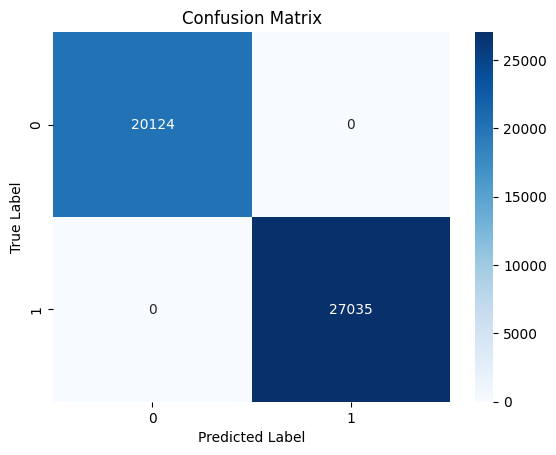

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cm' is your confusion matrix calculated from the previous step
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Phishing', 'Phishing'])
print(report)

              precision    recall  f1-score   support

Non-Phishing       1.00      1.00      1.00     20124
    Phishing       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



#Decision Trees and Random Forest - Luisana Ortiz

In [ ]:
#Import all necessary packages

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate features and target variable
#X = url_df.drop(['URL', 'Domain', 'TLD', 'Title', 'label'], axis=1)
# Remove remaining non-numeric/non-categorical columns,
# as well as the label column
#y = url_df['label']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Data preprocessing:
#Standard scaling is applied to the numeric features to bring them to a similar scale.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train a decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameters for tuning
#Hyperparameter tuning is performed using grid search cross-validation to
#find the best combination of hyperparameters.
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform grid search cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_tree_clf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_tree_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Optional: Feature importance analysis
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_tree_clf.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

                       Feature  Importance
27          URLSimilarityIndex    0.986845
37                  LineOfCode    0.012722
8                      IsHTTPS    0.000390
29               NoOfSubDomain    0.000043
0                   IsDomainIP    0.000000
28                   TLDLength    0.000000
30          NoOfObfuscatedChar    0.000000
31            NoOfLettersInURL    0.000000
32             NoOfDegitsInURL    0.000000
33             NoOfEqualsInURL    0.000000
34              NoOfQMarkInURL    0.000000
35          NoOfAmpersandInURL    0.000000
36  NoOfOtherSpecialCharsInURL    0.000000
38           LargestLineLength    0.000000
25                   URLLeng

[Text(0.2857142857142857, 0.9, 'x[27] <= 0.693\ngini = 0.49\nsamples = 188636\nvalue = [80756, 107880]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 80145\nvalue = [80145, 0]'),
 Text(0.42857142857142855, 0.7, 'x[37] <= -0.298\ngini = 0.011\nsamples = 108491\nvalue = [611, 107880]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 591\nvalue = [591, 0]'),
 Text(0.5714285714285714, 0.5, 'x[8] <= -0.685\ngini = 0.0\nsamples = 107900\nvalue = [20, 107880]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.7142857142857143, 0.3, 'x[29] <= -1.106\ngini = 0.0\nsamples = 107882\nvalue = [2, 107880]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 107880\nvalue = [0, 107880]')]

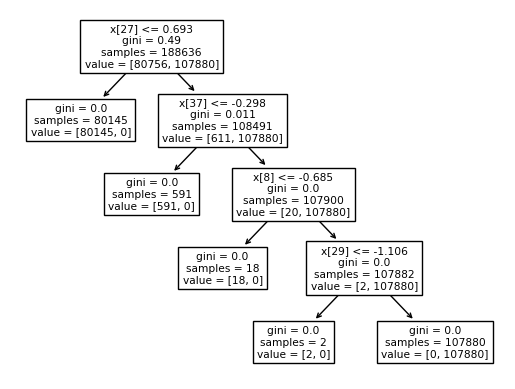

In [ ]:
#Visualize the decision tree
from sklearn.tree import plot_tree
plot_tree(best_tree_clf)

#SVM - Nathaniel Vasserman

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load data
file_path = "/content/drive/MyDrive/IST 407 Group Project/data/PhiUSIIL_Phishing_URL_Dataset.csv"
url_df = pd.read_csv(file_path, sep=",")

# Data Cleaning
columns_to_drop = ["FILENAME", "Title", "ObfuscationRatio", "URL", "Domain", "TLD"]
url_df.drop(columns=columns_to_drop, inplace=True)

# Splitting data into features (X) and target variable (y)
X = url_df.drop(columns=['label'])  # Features
y = url_df['label']  # Target variable

# Scaling numerical features
scaler = MinMaxScaler()
numerical_columns = ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'TLDLength', 'NoOfSubDomain',
                     'NoOfObfuscatedChar', 'NoOfLettersInURL', 'NoOfDegitsInURL', 'NoOfEqualsInURL',
                     'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode',
                     'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup',
                     'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
                     'NoOfExternalRef']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to your data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/IST 407 Group Project/data/PhiUSIIL_Phishing_URL_Dataset.csv'

In [ ]:
# Get the feature with the highest importance
top_feature = importance_df.iloc[0]['Feature']
top_importance = importance_df.iloc[0]['Importance']

print("Top Feature:", top_feature)
print("Importance:", top_importance)


In [ ]:
import matplotlib.pyplot as plt

# Extract feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load data
file_path = "/content/drive/MyDrive/IST 407 Group Project/data/PhiUSIIL_Phishing_URL_Dataset.csv"
url_df = pd.read_csv(file_path, sep=",")

# Data Cleaning
columns_to_drop = ["FILENAME", "Title", "ObfuscationRatio", "URL", "Domain", "TLD"]
url_df.drop(columns=columns_to_drop, inplace=True)

# Splitting data into features (X) and target variable (y)
X = url_df.drop(columns=['label'])  # Features
y = url_df['label']  # Target variable

# Scaling numerical features
scaler = MinMaxScaler()
numerical_columns = ['URLLength', 'DomainLength','TLDLength', 'NoOfSubDomain',
                     'NoOfObfuscatedChar', 'NoOfLettersInURL', 'NoOfDegitsInURL', 'NoOfEqualsInURL',
                     'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode',
                     'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup',
                     'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef'
                    ]
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM Classifier
svm_classifier = SVC()

# Fit the classifier to your data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


#PCA - Nathaniel Vasserman

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "/content/drive/MyDrive/IST 407 Group Project/data/PhiUSIIL_Phishing_URL_Dataset.csv"
url_df = pd.read_csv(file_path, sep=",")

# Data Cleaning
columns_to_drop = ["FILENAME", "Title", "ObfuscationRatio", "URL", "Domain", "TLD"]
url_df.drop(columns=columns_to_drop, inplace=True)

# Splitting data into features (X) and target variable (y)
X = url_df.drop(columns=['label'])  # Features
y = url_df['label']  # Target variable

# Scaling numerical features
scaler = MinMaxScaler()
numerical_columns = ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'TLDLength', 'NoOfSubDomain',
                     'NoOfObfuscatedChar', 'NoOfLettersInURL', 'NoOfDegitsInURL', 'NoOfEqualsInURL',
                     'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode',
                     'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup',
                     'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
                     'NoOfExternalRef']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform 2D PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot 2D PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.colorbar(label='Label')
plt.show()

# Display explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Initialize the SVM classifier
svm_classifier = SVC()

# Fit the classifier to your data
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and confusion matrix
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Phishing', 'Phishing'], yticklabels=['Not Phishing', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', alpha=0.5)

# Annotate with feature importances
for i, importance in enumerate(feature_importances):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(round(importance, 2)), fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Feature Importances with 2D PCA')
plt.show()


#Logistic Regression - David Obeng-Agyapong

##Data Train Test Split

In [ ]:
###Split the dataframe using train test split
from sklearn.model_selection import train_test_split

X = final_url_df  # features using
y = label  # target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##Build the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

#"default" parameters
log_model = LogisticRegression(max_iter=4000)
log_model.fit(X_train, y_train)

##Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Making predictions on the testing data
test_pred = log_model.predict(X_test)

accuracy_4_log = accuracy_score(y_test, test_pred)

print("Accuracy:", accuracy_4_log)
print(classification_report(y_test, test_pred))

##Cross Validation Method

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the logistic regression model
#model = LogisticRegression(max_iter=1000)

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1_score': 'f1'
}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_validate(log_model, X, y, cv=cv, scoring=scoring)

# Print the mean and standard deviation of each evaluation metric
for metric in scoring:
    print(f"{metric}: Mean={cv_results['test_' + metric].mean()}, Std={cv_results['test_' + metric].std()}")


In [ ]:
import matplotlib.pyplot as plt

# Define the evaluation metrics
metrics = list(scoring.keys())

# Extract mean and standard deviation for each metric
means = [cv_results['test_' + metric].mean() for metric in metrics]
stds = [cv_results['test_' + metric].std() for metric in metrics]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(metrics, means, yerr=stds, capsize=10, color='skyblue')
plt.title('Cross-Validation Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.0, 1.0)  # Assuming scores are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Holdout Method

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

clf = LogisticRegression()
score = clf.fit(X_train, y_train).score(X_test, y_test)
print("Accuracy\t: ", score)

##Visual for Holdout Method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined.

clf = LogisticRegression()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Accuracy\t: ", score)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# Classification report
print(classification_report(y_test, y_pred))

# Using Seaborn to create a heatmap from the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##Bootstrap Evaluation Method

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# Let's assume your dataset is in a variable called `data` with features `X` and target `y`.
# And your trained model is `trained_model`.

# Define the number of bootstrap samples to create
n_iterations = 1000
n_size = int(len(X) * 0.50)  # 50% of the dataset

# To store the scores
scores = list()

# Print the summary
print('Accuracy Score: %.3f' % np.mean(scores))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Example definitions, replace with your actual data and model
X = pd.DataFrame(np.random.randn(100, 4))  # random data in a DataFrame
y = pd.Series(np.random.randint(0, 2, size=100))  # binary target variable

n_iterations = 1000
n_size = int(len(X) * 0.50)  # 50% of the dataset

scores = []

for i in range(n_iterations):
    print(f"Starting iteration {i+1}")
    boot_indices = np.random.choice(X.index, size=n_size, replace=True)
    out_of_bag_indices = np.array(list(set(X.index) - set(boot_indices)))

    X_train, y_train = X.loc[boot_indices], y.loc[boot_indices]
    X_test, y_test = X.loc[out_of_bag_indices], y.loc[out_of_bag_indices]

    try:
        predictions = X.predict(X_test)  # Assuming 'trained_model' is your model object
        score = accuracy_score(y_test, predictions)
        scores.append(score)
        print(f"Score for iteration {i+1}: {score}")
    except Exception as e:
        print(f"Error during iteration {i+1}: {str(e)}")

mean_accuracy = np.mean(scores)
print(f'Average Accuracy: {mean_accuracy:.5f}')  # 5 decimal places
print(f'Average Accuracy Percentage: {mean_accuracy * 100:.2f}%')  # 2 decimal places percentage


##Feature Importance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'final_url_df' and 'label' are your features and target variable
X = final_url_df  # features
y = label  # target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

In [ ]:
import pandas as pd

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]  # This extracts the coefficients of the features
features = X.columns  # This assumes that your DataFrame has column names

# Create a DataFrame for easier plotting
coefficients_df = pd.DataFrame({'Features': features, 'Coefficients': coefficients})
coefficients_df['Absolute Coefficients'] = coefficients_df['Coefficients'].abs()

# Sorting the DataFrame by the absolute value of coefficients
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficients', ascending=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficients', y='Features', data=coefficients_df)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()

##New Train & Test Split 60/40

In [ ]:
from sklearn.model_selection import train_test_split

# New train-test split with 40% test size
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a new logistic regression model
model2 = LogisticRegression(random_state=42, max_iter=1000)
model2.fit(X_train2, y_train2)

In [ ]:
predictions2 = model2.predict(X_test2)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Generate the classification report
report2 = classification_report(y_test2, predictions2)
print(report2)

# Calculate the accuracy score
accuracy2 = accuracy_score(y_test2, predictions2)
print("Accuracy Score (with 40% test data):", accuracy2)

##New Train & Test Split 90/10

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming X and y have been defined earlier
# Perform the train-test split with 90% training data and 10% testing data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the new training data
model.fit(X_train2, y_train2)

In [ ]:
# Predict the labels for the new test set
y_pred2 = model.predict(X_test2)

# Generate the classification report for the new predictions
report = classification_report(y_test2, y_pred2)
print(report)

# Calculate the accuracy score for the new predictions
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy Score (with 10% test data): {accuracy:.2f}")

##Let's tune the model now

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the model
model = LogisticRegression(random_state=42)

# Define a hyperparameter grid to search
# Here are some basic hyperparameters for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

In [ ]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
best_predictions = best_model.predict(X_test)

# Generate the classification report
best_report = classification_report(y_test, best_predictions)
print(best_report)

# Calculate the accuracy score
best_accuracy = accuracy_score(y_test, best_predictions)
print("Accuracy Score on Test Data:", best_accuracy)

##New Tune method since last grid_search took too long

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
# Define the logistic regression model
model = LogisticRegression(solver='saga', random_state=42)  # 'saga' is efficient for large datasets

In [ ]:
# Define the parameter distribution
param_dist = {
    'C': uniform(loc=0, scale=4),  # Regularization strength
    'penalty': ['l2', 'none'],  # 'saga' also supports 'l1' but using 'l2' and 'none' for simplicity
}

In [ ]:
# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=3,       # Use a smaller number of folds for a large dataset
    verbose=1,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

In [ ]:
# Perform the random search on a subset of the training data
random_search.fit(X_train, y_train)

In [ ]:
# Best parameter set found
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

In [ ]:
# Retrieve the best model
best_model = random_search.best_estimator_

#Gradient Boosting - Lisa Nguyen

##Implementation of Gradiant Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

##Data Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = final_url_df # Features
y = label  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))

In [ ]:
import numpy as np
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print("Class Distribution:")
for cls, count in zip(unique_classes, class_counts):
    print("Class {}: {} samples".format(cls, count))

##Build Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier with adjusted parameters
model_GB = GradientBoostingClassifier(n_estimators=50, max_depth=15, max_features=50, random_state=42)

# Train the model on the training data
model_GB.fit(X_train, y_train)

In [ ]:
# Check the shapes of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

In stratified sampling, the stratify=y parameter in train_test_split ensures that the distribution of classes in the target variable y is preserved when splitting the data into training and testing sets. It does this by adjusting the splitting process to create training and testing sets that maintain the same proportion of classes as the original dataset.

When you observe the shapes of X_train and y_train after using stratified sampling, you'll notice that the number of rows in y_train remains the same as the original dataset, but the number of rows in X_train might change if the data is split differently to maintain the class proportions.

In your example, X_train has a shape of (188636, 49) and y_train has a shape of (188636,). This means that y_train has the same number of samples as the original dataset, ensuring that the class distribution is preserved. However, X_train may have a different number of samples compared to the original dataset because the stratified sampling process adjusts the data splitting to maintain class proportions.

So, in summary, stratified sampling does not create more rows in y_train; instead, it ensures that the distribution of classes in y_train remains consistent with the original dataset while adjusting the data splitting to achieve this.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

test_pred = model_GB.predict(X_test)

accuracy_4_GB = accuracy_score(y_test, test_pred)

print("Accuracy", accuracy_4_GB)

##Subset final_url_df

In [ ]:
print("Number of samples in X_test:", len(X_test))
print("Number of samples in y_test:", len(y_test))

In [ ]:
# Predict labels for all instances in final_url_df
#predicted_labels_all = model_GB.predict(final_url_df.drop('predicted_label', axis=1))
predicted_labels_all = model_GB.predict(final_url_df)

# Add predicted labels to the final_url_df DataFrame
final_url_df['predicted_label'] = predicted_labels_all

final_url_df

In [ ]:
final_url_df_with_label = pd.concat([final_url_df, label], axis=1)
final_url_df_with_label

In [ ]:
# Filter the DataFrame for misclassified rows
misclassified_df_all = final_url_df_with_label[final_url_df_with_label['label'] != final_url_df_with_label['predicted_label']]

# Display the misclassified rows
misclassified_df_all

##Evaluation Methods

###Precision, Recall and F-1 Score

In [ ]:
from sklearn.metrics import classification_report

# Extract true labels (y_true) and predicted labels (predicted_labels)
y_true = final_url_df_with_label['label']
predicted_labels = final_url_df_with_label['predicted_label']

report_GB = classification_report(y_true, predicted_labels)

# Print the classification report
print(report_GB)

##Compute and Visualize ROC-AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, predicted_labels)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_true, predicted_labels)

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##Feature Importance

In [ ]:
import numpy as np

feature_importances_GB = model_GB.feature_importances_

# Get feature names
feature_names = final_url_df_with_label.drop(['label', 'predicted_label'], axis=1).columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances_GB)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature '{feature_names[idx]}' ({feature_importances_GB[idx]})")

# Plot the feature importances
plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances_GB)), feature_importances_GB[indices], align="center", color='hotpink')
plt.xticks(range(len(feature_importances_GB)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_exploration_df = pd.concat([final_url_df_with_label, label], axis=1)


# Select the features of interest
features_of_interest = ['NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL']

# Create a pairplot
sns.pairplot(data_exploration_df[features_of_interest], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Character Composition Features', y=1.02)
plt.show()


In [ ]:
final_url_df_with_label

In [ ]:
explore_df_onlylegit = final_url_df_with_label[final_url_df_with_label['label'] == 0]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = explore_df_onlylegit[['NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Character Composition Features')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data_exploration_df[['NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Character Composition Features')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for known phishing URLs (assuming 'label' column indicates phishing URLs)
#phishing_urls_df = final_url_df_with_label[final_url_df_with_label['label'] == 1]

import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a KDE plot for URLSimilarityIndex for phishing URLs
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_url_df_with_label[final_url_df_with_label['label'] == 1]['URLSimilarityIndex'], shade=True, color='skyblue')
plt.title('Kernel Density Estimate Plot of URL Similarity Index for Phishing URLs')
plt.xlabel('URL Similarity Index')
plt.ylabel('Density')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Count the number of URLs with and without HTTPS
https_counts = data_exploration_df['IsHTTPS'].value_counts()

# Plot the proportion of URLs using HTTPS
plt.figure(figsize=(10, 8))
https_counts.plot(kind='bar', color=['turquoise', '#FFA500'])
plt.title('Proportion of URLs Using HTTPS')
plt.xlabel('IsHTTPS')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

In [ ]:
# Count the number of URLs with and without HTTPS
https_counts = explore_df_onlylegit['IsHTTPS'].value_counts()

# Plot the proportion of URLs using HTTPS
plt.figure(figsize=(6, 4))
https_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Proportion of URLs Using HTTPS')
plt.xlabel('IsHTTPS')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define data
has_elements = data_exploration_df[['HasTitle', 'HasFavicon', 'Robots', 'IsResponsive']].sum()

# Plot pie chart
plt.figure(figsize=(10, 12))
plt.pie(has_elements, labels=has_elements.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'], startangle=140)
plt.title('Presence of Webpage Elements')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Define data
has_elements = explore_df_onlylegit[['HasTitle', 'HasFavicon', 'Robots', 'IsResponsive']].sum()
jade_green_colors = ['#8CD790', '#4E9E76', '#257D5B', '#1A5642']

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(has_elements, labels=has_elements.index, autopct='%1.1f%%', colors=jade_green_colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
plt.title('Presence of Webpage Elements')

# Draw a white circle in the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define warm/cool colors
red_hue_colors = ['#FF5733', '#FF6347', '#FF7256', '#FF7F50']

# Define data
has_elements = explore_df_onlylegit[['HasTitle', 'HasFavicon', 'Robots', 'IsResponsive']].sum()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(has_elements, labels=has_elements.index, autopct='%1.1f%%', colors=red_hue_colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
plt.title('Presence of Webpage Elements')

# Draw a white circle in the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define shades of jade green colors
jade_green_colors = ['#8CD790', '#4E9E76', '#257D5B', '#1A5642']

# Define data
has_elements = data_exploration_df[['HasTitle', 'IsResponsive', 'HasFavicon', 'Robots']].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(has_elements, labels=has_elements.index, autopct='%1.1f%%', colors=jade_green_colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
plt.title('Presence of Webpage Elements')

# Draw a white circle in the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()
